In [1]:
# Exploratory Analysis

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline

In [3]:
nRowsRead = None # specify 'None' if want to read whole file
#df1 = pd.read_csv()
df1 = pd.read_csv("/Users/priyanshusankhala/Downloads/onehundred.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'companies_sorted.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 396 rows and 14 columns


In [5]:
#df1 = pd.read_csv('../input/companies_sorted.csv', delimiter=',', nrows = nRowsRead)

In [4]:
df1.dataframeName = 'onehundred.csv'

In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [6]:
df1.head()

,Company Name,Company url,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0.000,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,0.333,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2.000,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1.000,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1.000,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


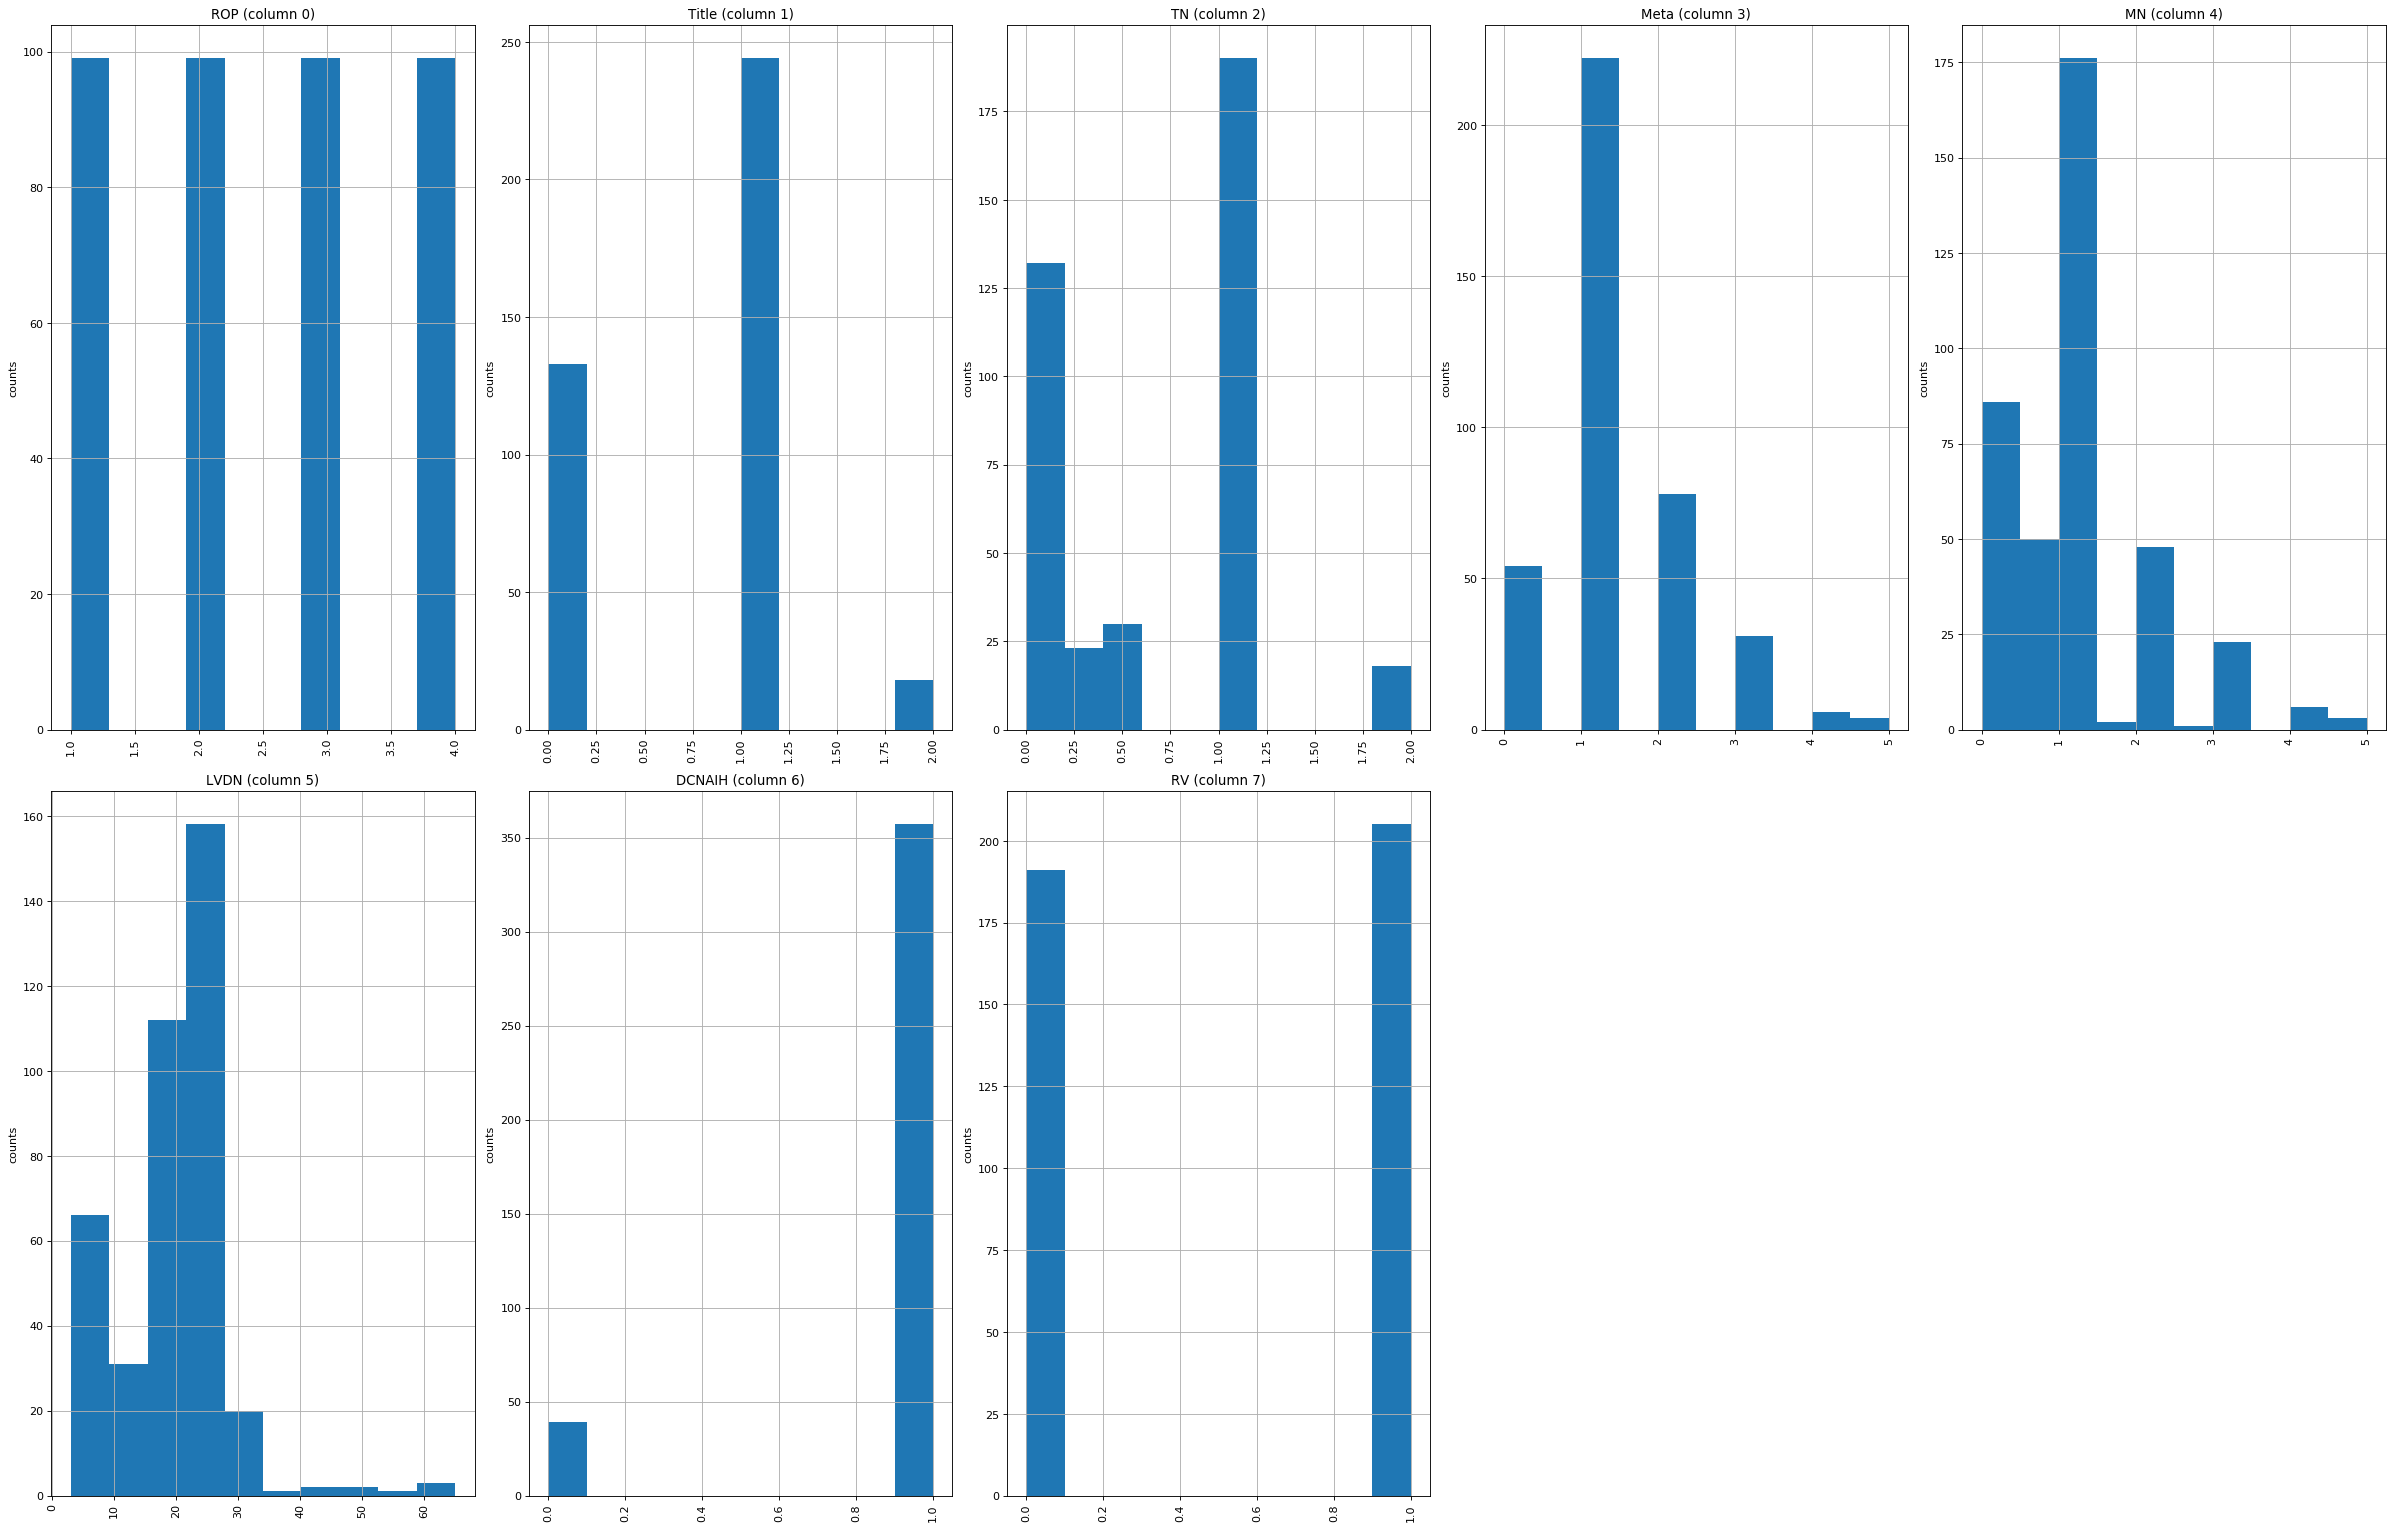

In [7]:
plotPerColumnDistribution(df1, 10, 5)

In [113]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

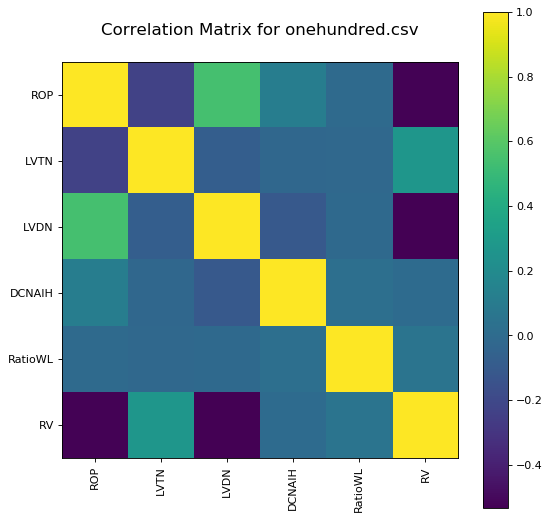

In [114]:
plotCorrelationMatrix(df1, 8)

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108291358>,
      dtype=object)

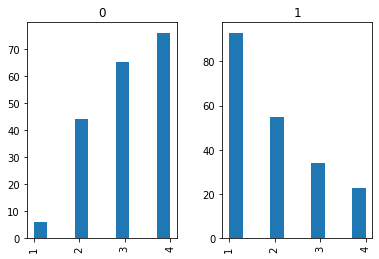

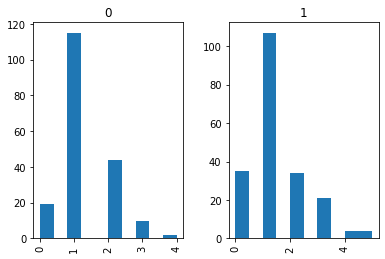

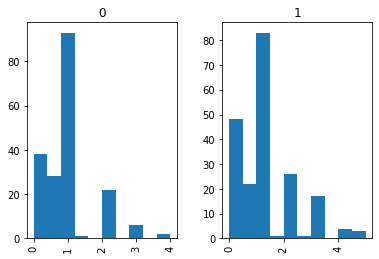

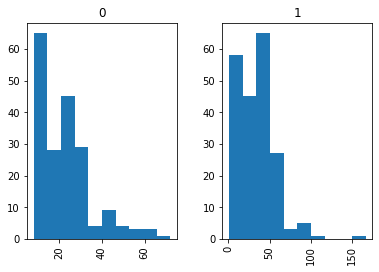

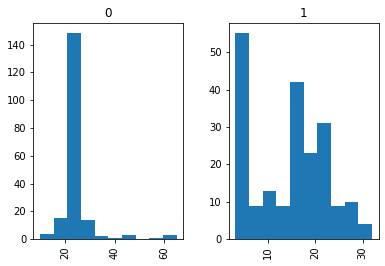

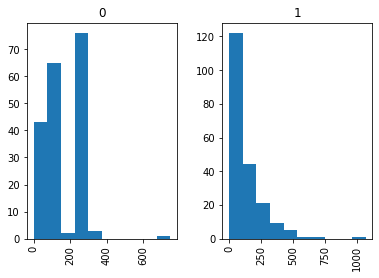

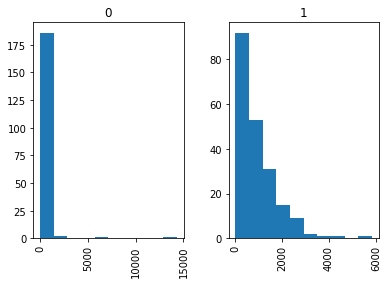

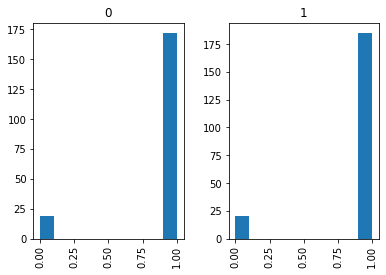

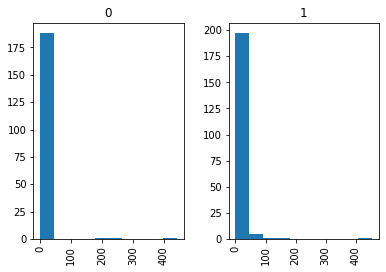

In [9]:
#df1.hist(column='TN', by='RV')
df1.hist(column='ROP', by='RV')
df1.hist(column='Meta', by='RV')
df1.hist(column='MN', by='RV')
df1.hist(column='LVTN', by='RV')
df1.hist(column='LVDN', by='RV')
df1.hist(column='Links', by='RV')
df1.hist(column='Word', by='RV')
df1.hist(column='DCNAIH', by='RV')
df1.hist(column='RatioWL', by='RV')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ecf95c0>,
      dtype=object)

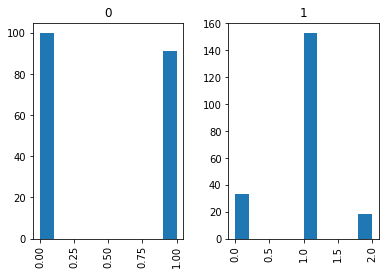

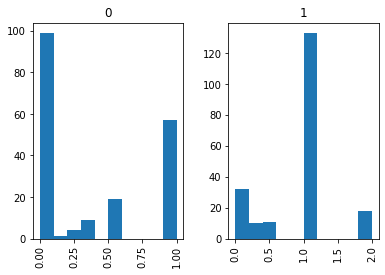

In [118]:
# from matplotlib.pyplot import hist
# df1 = pd.DataFrame({
#     'Title': np.random.randn(100),
#     'RV': 100 * np.random.rand()
# })
# hist(df1.RV, weights=df.Title)
#df1.hist(column='Title', by='RV', bins=35)
df1.hist(column='Title', by='RV')
df1.hist(column='TN', by='RV')
# df1.hist(column='ROP', by='RV')
# df1.hist(column='Meta', by='RV')
# df1.hist(column='MN', by='RV')
# df1.hist(column='LVTN', by='RV')
# df1.hist(column='LVDN', by='RV')
# df1.hist(column='Links', by='RV')
# df1.hist(column='Words', by='RV')
# df1.hist(column='DCNAIH', by='RV')
# df1.hist(column='RatioWL', by='RV')

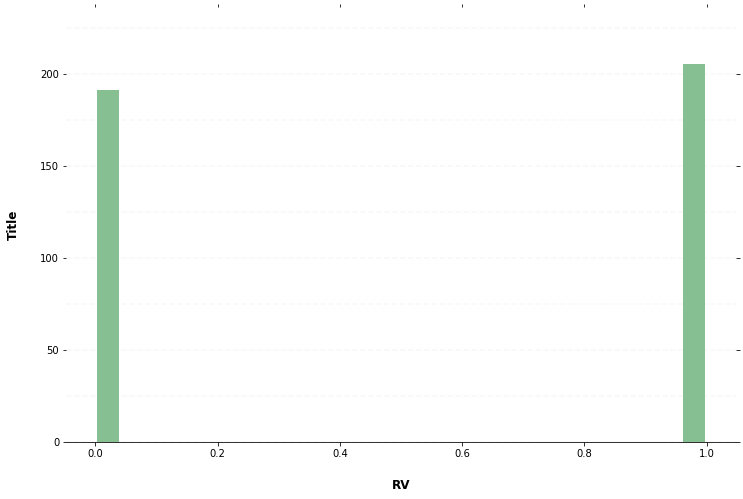

In [97]:
# ax = df1.hist(column='RV', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

# ax = ax[0]
# for x in ax:

#     # Despine
#     x.spines['right'].set_visible(False)
#     x.spines['top'].set_visible(False)
#     x.spines['left'].set_visible(False)

#     # Switch off ticks
#     x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#     # Draw horizontal axis lines
#     vals = x.get_yticks()
#     for tick in vals:
#         x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

#     # Remove title
#     x.set_title("")
#     # Set x-axis label
#     x.set_xlabel("RV", labelpad=20, weight='bold', size=12)

#     # Set y-axis label
#     x.set_ylabel("Title", labelpad=20, weight='bold', size=12)

#     # Format y-axis label
#    # x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

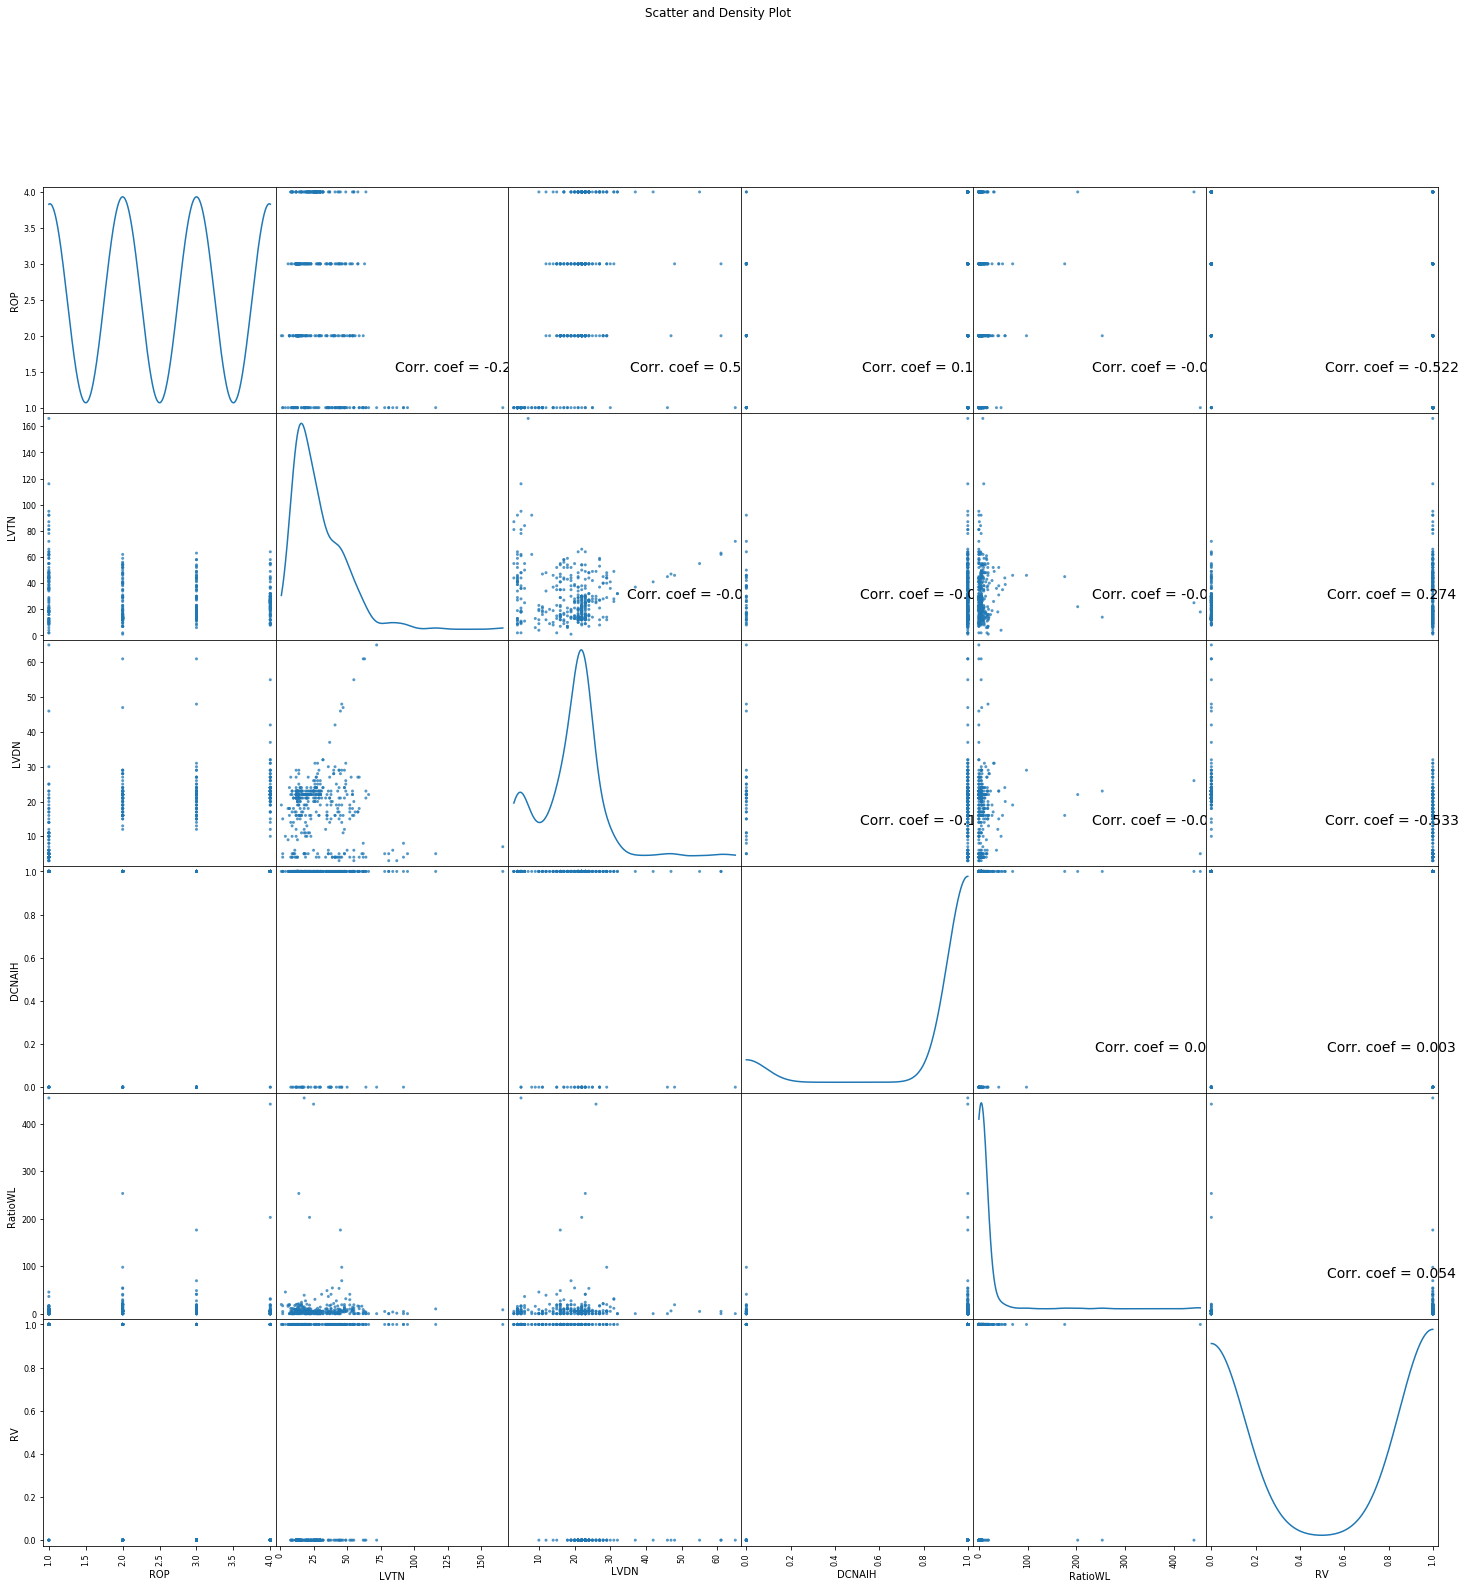

In [134]:
plotScatterMatrix(df1, 25, 14)

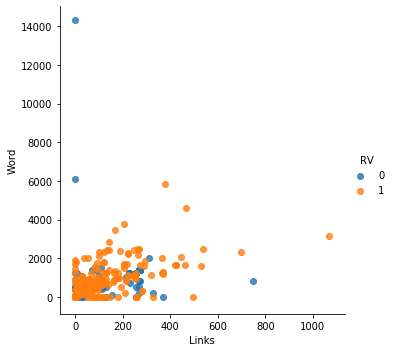

In [10]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Links', y='Word', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

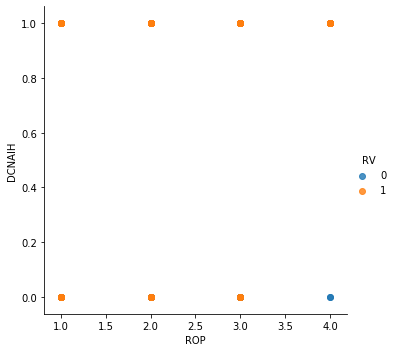

In [34]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='ROP', y='DCNAIH', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

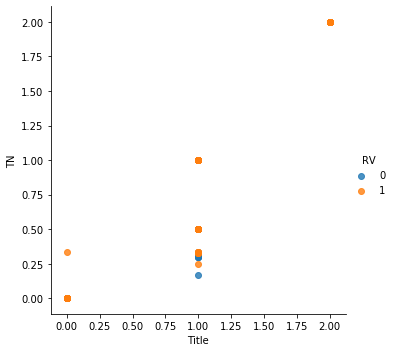

In [37]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Title', y='TN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

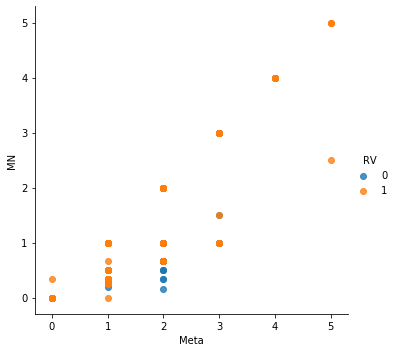

In [36]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Meta', y='MN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

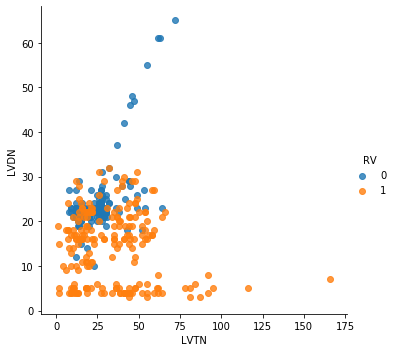

In [38]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='LVTN', y='LVDN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

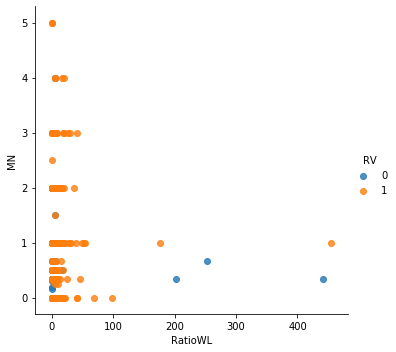

In [39]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='RatioWL', y='MN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

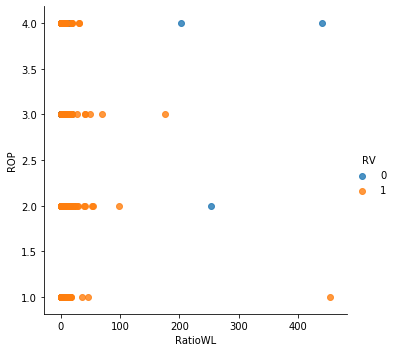

In [40]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='RatioWL', y='ROP', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

In [133]:
# # Multivariate scatter plots¶
# footballers = df1.copy()
# sns.lmplot(x='RatioWL', y='TN', hue='RV', 
#            data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
#            fit_reg=False)

In [42]:
# # from pandas.plotting import parallel_coordinates

# # p = (df1[(df1['Response Variable'].isin(["1", "0"]))]
# #          .loc[:, ['Response Variable''Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)']]
# #     )

# # parallel_coordinates(p, 'Response Variable')
# import plotly.express as px
# df1 = px.data.df1
# fig = px.parallel_coordinates(df1, color="Response Variable", labels={"Response Variable": "Response",
#                 "Rank of page": "Rank", "Appeared in Title": "Title",
#                 "Levenshtein distance(Domain-Name)7": "LV DIS", "no. of links(8)": "total links", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

In [43]:

# sns.heatmap(
#     df1.loc[:, ['Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)', 'Response Variable']].corr(),
#     annot=True
# )

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

from math import pi
from pandas.plotting import parallel_coordinates
# import plotly.graph_objs as go
# import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# importing libraries for plot
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [12]:
# # Rename all columns
# df2 = df1.rename(columns= {"Rank of page": "ROP",
#                      "Appeared in Title":"Title",
#                      "Number of words in company name appering in meta tag(4)":"Meta",
#                      "Ttile and normalized(3)":"TN",
#                      "Number of words in company name appering in meta tag,normalized(5)":"MN",
#                      "Levenshtein title and name(6)":"LVTN",
#                      "Levenshtein distance(Domain-Name)7":"LVDN",
#                      "no. of links(8)":"Links",
#                      "Word Count(9)":"Word",
#                      "Does Company name apperars in html(10)":"DCNAIH",
#                      "Ratio of words in the site content to all links on the page(11)":"RatioLW",
#                      "Response Variable":"RV"},
#                                  inplace = True)

In [13]:
df1.head()

,Company Name,Company url,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0.000,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,0.333,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2.000,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1.000,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1.000,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


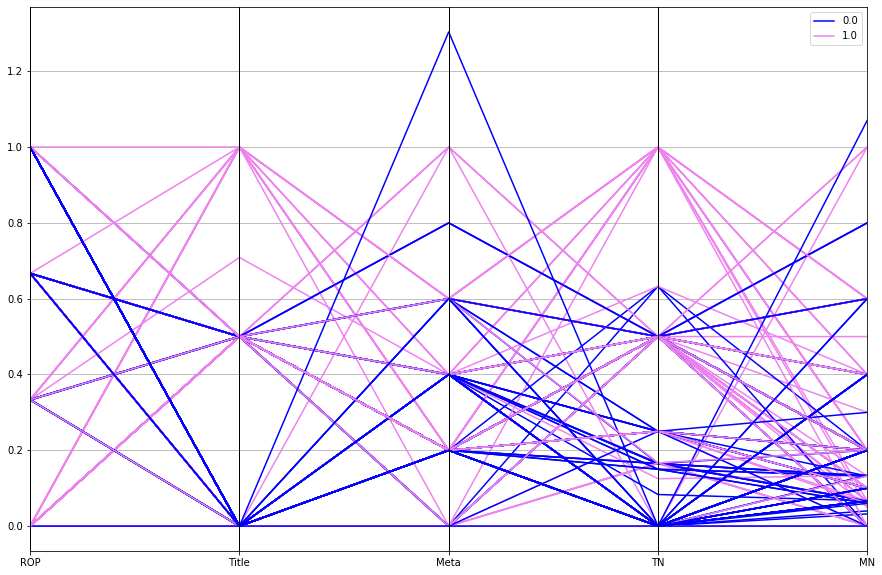

In [57]:
# Parallel Plot
d = df_normalized[['ROP', 'Title', 'Meta','TN','MN','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()


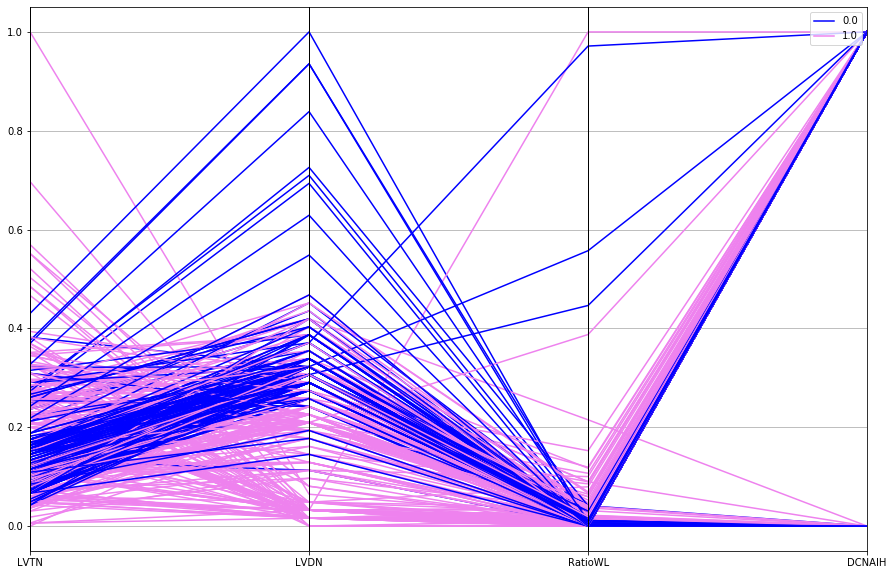

In [59]:
#'LVDN','MN','LVTN','DCNAIH','RatioWL',
# Parallel Plot
d = df_normalized[['LVTN','LVDN','RatioWL','DCNAIH','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

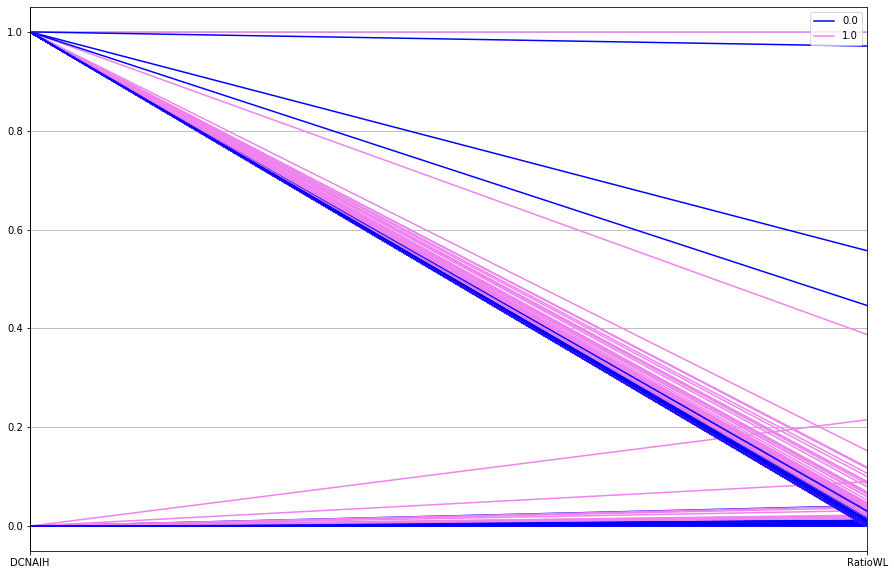

In [64]:
# Parallel Plot
d = df_normalized[['DCNAIH','RatioWL','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

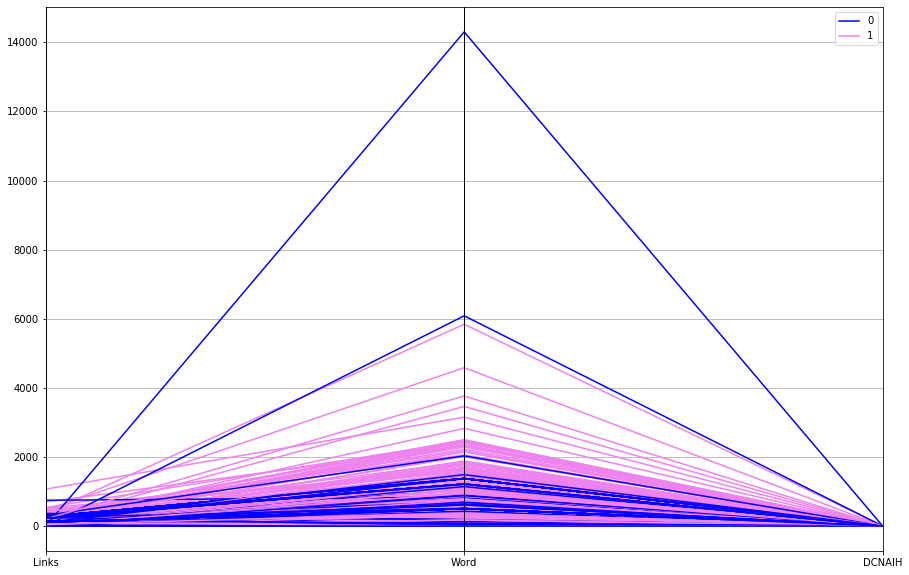

In [68]:
# Parallel Plot
d = df1[['Links','Word','DCNAIH','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

In [18]:
from bokeh.plotting import figure, show
import pandas as pd

df2 = pd.DataFrame()

p = figure(x_axis_label="Title", y_axis_label="RV", 
           title="html tags")
p.circle("X", "Y", size=15, source=df)

show(p)


NameError: name 'df' is not defined

In [19]:
# Corelation Matrix
corrMatrix = df1.corr()
print (corrMatrix)

              ROP     Title        TN      Meta        MN      LVTN      LVDN  \
ROP      1.000000 -0.478396 -0.490578 -0.062635 -0.056855 -0.232457  0.545996   
Title   -0.478396  1.000000  0.930608  0.248903  0.235578  0.126023 -0.338287   
TN      -0.490578  0.930608  1.000000  0.225134  0.314643  0.161666 -0.392395   
Meta    -0.062635  0.248903  0.225134  1.000000  0.870285  0.099729 -0.109284   
MN      -0.056855  0.235578  0.314643  0.870285  1.000000  0.085359 -0.198901   
LVTN    -0.232457  0.126023  0.161666  0.099729  0.085359  1.000000 -0.074300   
LVDN     0.545996 -0.338287 -0.392395 -0.109284 -0.198901 -0.074300  1.000000   
Links   -0.130215  0.050133  0.072005  0.000932 -0.000944 -0.003301 -0.145184   
Word    -0.039752  0.022462  0.033768  0.004279  0.014924 -0.039076 -0.051524   
DCNAIH   0.117493  0.430143  0.377745  0.339412  0.302322 -0.022983 -0.107805   
RatioWL -0.000528  0.017953  0.015171 -0.032072 -0.049616 -0.015642 -0.011867   
RV      -0.522076  0.412308 

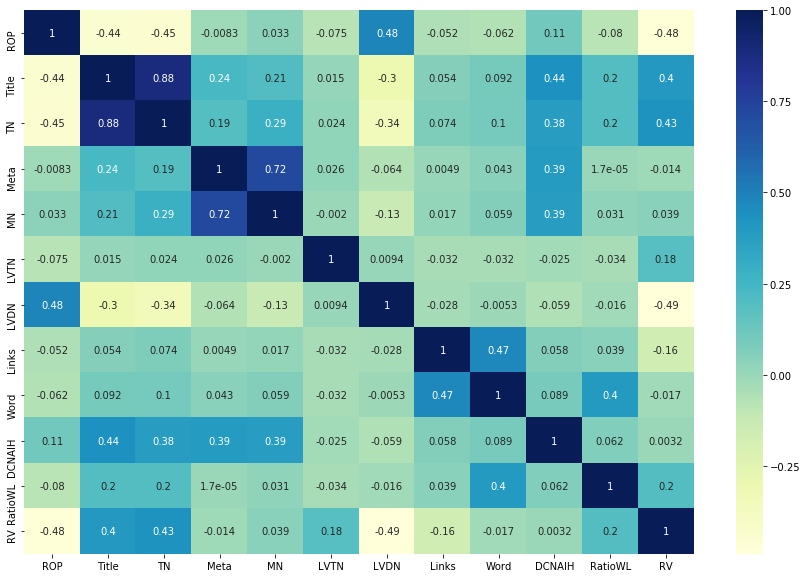

In [129]:
from scipy.stats.stats import kendalltau
corr = df1.corr(method='kendall')
#rcParams['figure.figsize'] = 14.7,8.27
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

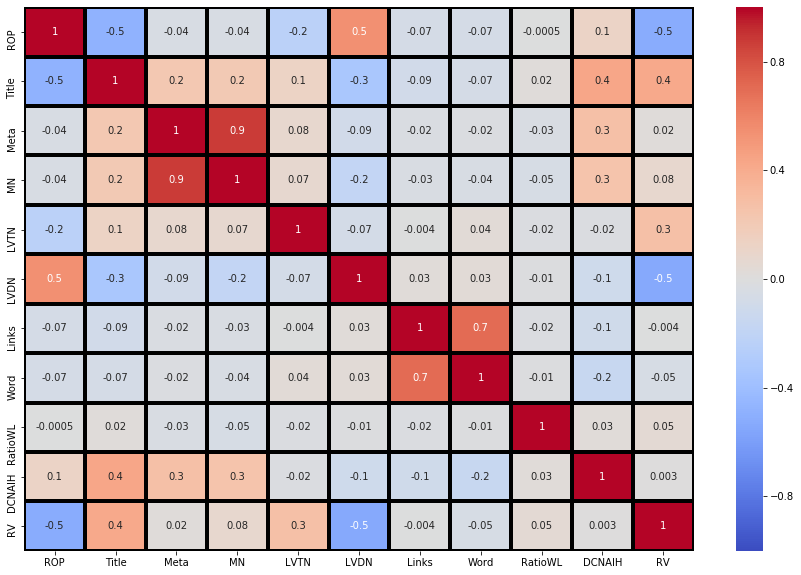

In [69]:
# Co relation Plot
from scipy.stats.stats import kendalltau
plt.figure(figsize=(15, 10))
sns.heatmap(
    df_normalized.loc[:, ['ROP', 'Title', 'Meta', 'MN', 'LVTN', 'LVDN', 'Links', 'Word', 'RatioWL','DCNAIH','RV']].corr(),
    annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black'
)

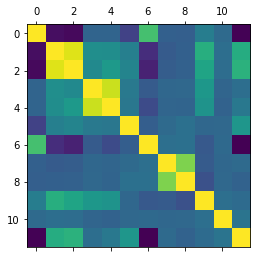

In [77]:
# import matplotlib.pyplot as plt
# plt.imshow(df_normalized.corr(), cmap='coolwarm', interpolation='none')
# plt.colorbar()
# plt.xticks(range(len(df_normalized.columns)), df_normailezed.colums, rotation=90)
# plt.yticks(range(len(df_normalized.columns)), df_normailezed.colums)
# plt.gef().set_size_inches(0,8)

# labels = df_normalized.corr().values
# for y in range(labels.shape[0]):
#     for x in range(labels.shape[1]):
#         plt.text(x,y, '{:.2f}'.format(labels[y,x]), ha='center', va='center', color='white')    
import matplotlib.pyplot as plt

plt.matshow(df_normalized.corr())
plt.show()

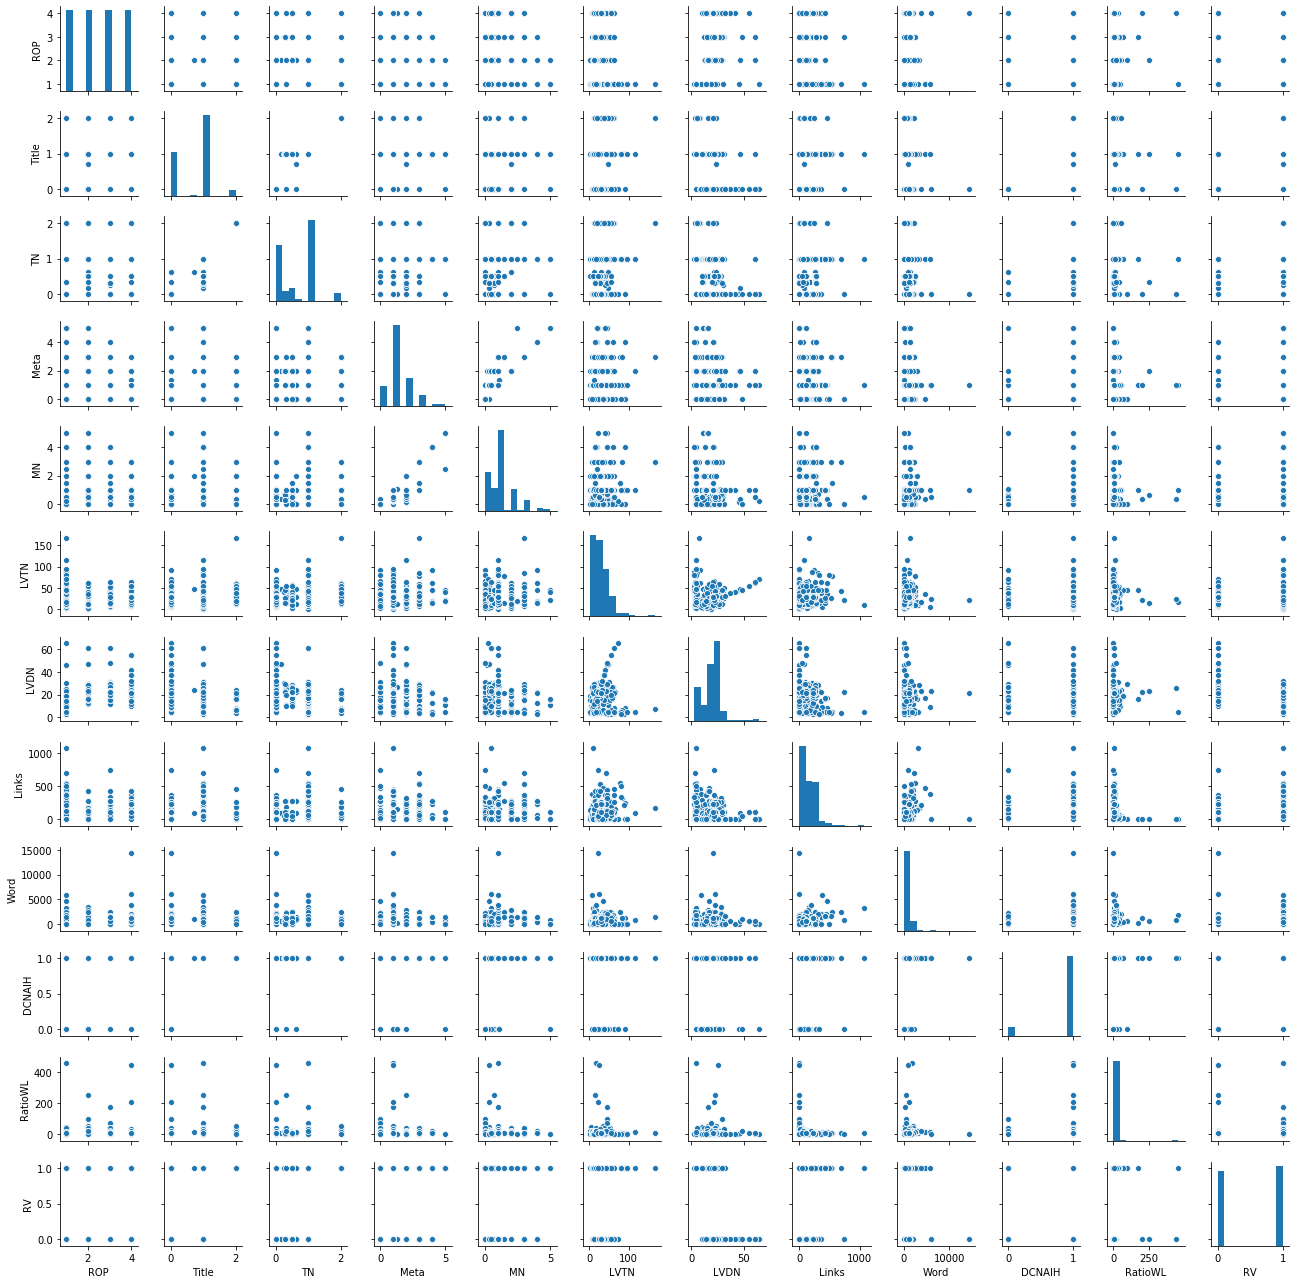

In [72]:
df1_pairplot = df1.dropna()
sns.pairplot(df1_pairplot, height=1.5)

In [9]:
# # # # Example Data
# # # x =     df1.loc[:, ['ROP', 'Title', 'Meta', 'MN', 'LVTN', 'LVDN', 'Links', 'Word', 'RatioWL','DCNAIH','RV']]

# # # #Normalized Data
# # # normalized = (x-min(x))/(max(x)-min(x))

# # # # Histogram of example data and normalized data
# # # par(mfrow=c(1,2))
# # # hist(x,          breaks=10, xlab="Data",            col="lightblue", main="")
# # # hist(normalized, breaks=10, xlab="Normalized Data", col="lightblue", main="")

# # # copy the data
# # df_max_scaled = df1.copy()
  
# # # apply normalization techniques
# # for column in df_max_scaled.columns:
# #     df_max_scaled[column] = (x-min(x))/(max(x)-min(x))
# #     df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# # # view normalized data
# # display(df_max_scaled)
# # copy the data
# df_min_max_scaled = df1.copy()
  
# # apply normalization techniques
# for column in df_min_max_scaled.columns:
#     df_min_max_scaled[column] = int(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / int(df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# # view normalized data
# print(df_min_max_scaled)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [20]:
#df1.drop(df1. columns[1],axis=1,inplace=True)
df1.drop('Company Name',axis=1).head()
df1.drop('Company url',axis=1).head()

,Company Name,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,"""cecaci"" centro de capacitacion comercial e in...",1,0.0,0.000,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,1,1.0,0.333,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,1,2.0,2.000,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,1,1.0,1.000,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,1,1.0,1.000,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


In [21]:
df1.head()

,Company Name,Company url,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0.000,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,0.333,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2.000,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1.000,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1.000,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


In [22]:
df1.drop(['Company Name','Company url'],axis=1, inplace=True)

In [23]:
# # apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
# def maximum_absolute_scaling(df1):
#     # copy the dataframe
#     df_scaled = df1.copy()
#     # apply maximum absolute scaling
#     for column in df_scaled.columns:
#         df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
#     return df_scaled
    
# # call the maximum_absolute_scaling function
# df_scaled = maximum_absolute_scaling(df1)

# df_scaled

### Normalizing data

In [24]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df1):
    # copy the dataframe
    df_norm = df1.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_normalized = min_max_scaling(df1)

df_normalized

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,0.0,0.0,0.0000,0.4,0.0320,0.266667,0.693548,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.5,0.1665,0.2,0.0666,0.121212,0.129032,0.000000,0.000000,1.0,0.000000,1.0
2,0.0,1.0,1.0000,0.2,0.2000,0.369697,0.080645,0.430309,0.114661,1.0,0.007853,1.0
3,0.0,0.5,0.5000,0.4,0.4000,0.066667,0.016129,0.112254,0.051388,1.0,0.013491,1.0
4,0.0,0.5,0.5000,0.2,0.0000,0.242424,0.016129,0.189897,0.117947,1.0,0.018305,1.0
5,0.0,0.0,0.0000,0.0,0.0000,0.103030,0.129032,0.000000,0.000000,0.0,0.000000,1.0
6,0.0,0.5,0.5000,0.2,0.2000,0.296970,0.048387,0.102900,0.041739,1.0,0.011954,1.0
7,0.0,0.5,0.1665,0.6,0.2000,0.115152,0.112903,0.169317,0.000000,1.0,0.000000,1.0
8,0.0,0.5,0.5000,0.4,0.4000,0.109091,0.129032,0.151543,0.059638,1.0,0.011598,1.0
9,0.0,0.5,0.5000,0.0,0.0000,0.048485,0.016129,0.066417,0.008530,1.0,0.003785,1.0


In [33]:
df_normalized.isnull().sum()

ROP        0
Title      0
TN         0
Meta       0
MN         0
LVTN       0
LVDN       0
Links      0
Word       0
DCNAIH     0
RatioWL    0
RV         0
dtype: int64

In [32]:
df_normalized['MN'].fillna((df1['MN'].mean()), inplace=True)
df_normalized['Title'].fillna((df1['Title'].mean()), inplace=True)
df_normalized['TN'].fillna((df1['TN'].mean()), inplace=True)
df_normalized['Meta'].fillna((df1['Meta'].mean()), inplace=True)
df_normalized['Links'].fillna((df1['Links'].mean()), inplace=True)
df_normalized['Word'].fillna((df1['Word'].mean()), inplace=True)

In [27]:
df_normalized.head()

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,0.0,0.0,0.0000,0.4,0.0320,0.266667,0.693548,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.5,0.1665,0.2,0.0666,0.121212,0.129032,0.000000,0.000000,1.0,0.000000,1.0
2,0.0,1.0,1.0000,0.2,0.2000,0.369697,0.080645,0.430309,0.114661,1.0,0.007853,1.0
3,0.0,0.5,0.5000,0.4,0.4000,0.066667,0.016129,0.112254,0.051388,1.0,0.013491,1.0
4,0.0,0.5,0.5000,0.2,0.0000,0.242424,0.016129,0.189897,0.117947,1.0,0.018305,1.0


## Sampling and feature elimination if we have imbalance class

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
#x, y = df1(return_X_y=True)

In [36]:
df1['RV'].value_counts()

1    205
0    191
Name: RV, dtype: int64

In [37]:
# To check if we have a imbalance class
count_incorrect_link = len(df1[df1['RV']==0])
count_correct_link = len(df1[df1['RV']==1])
pct_of_no_sub = count_incorrect_link/(count_incorrect_link+count_correct_link)
print("percentage of Incorrect link is", pct_of_no_sub*100)
pct_of_sub = count_correct_link/(count_incorrect_link+count_correct_link)
print("percentage of Correct link", pct_of_sub*100)


percentage of Incorrect link is 48.23232323232323
percentage of Correct link 51.76767676767676


In [38]:
df1.groupby('RV').mean()

,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL
RV,,,,,,,,,,,
0,3.104712,0.476440,0.377513,1.268606,0.978658,23.141361,23.832461,154.405972,856.782358,0.900524,8.702111
1,1.936585,0.925409,0.870089,1.336585,1.155673,33.541463,14.463415,121.827027,869.624390,0.902439,12.742967


In [39]:
df_normalized.groupby('ROP').mean()

,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
ROP,,,,,,,,,,,
0.000000,0.474747,0.468010,0.286869,0.232976,0.232201,0.102639,1.540899,8.783198,0.868687,0.022034,0.939394
0.333333,0.451605,0.388578,0.254545,0.220835,0.141414,0.293744,1.510455,0.065102,0.888889,0.027802,0.555556
0.666667,0.388889,0.325421,0.246465,0.189549,0.141169,0.305474,0.139288,0.058023,0.868687,0.021139,0.343434
1.000000,0.106061,0.092591,0.265695,0.221525,0.152495,0.329260,0.100009,0.056054,0.979798,0.024126,0.232323


In [84]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

In [85]:
X = df_normalized.loc[:, df_normalized.columns != 'RV']
y = df_normalized.loc[:, df_normalized.columns == 'RV']

In [86]:
#  SMOTE-Synthetic Minority Oversampling Technique 
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [87]:
data_final_vars=df_normalized.columns.values.tolist()

# y=['y']
# X=[i for i in data_final_vars if i not in y]

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# rfe = RFE(logreg, 20)
# rfe = rfe.fit(X, y.values.ravel())
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)# print(rfe.support_)
# print(rfe.ranking_)

[[ 1 61]
 [ 0 57]]


In [88]:
print(y)

      RV
0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
10   1.0
11   1.0
12   1.0
13   1.0
14   1.0
15   1.0
16   1.0
17   1.0
18   1.0
19   1.0
20   0.0
21   1.0
22   1.0
23   1.0
24   1.0
25   1.0
26   1.0
27   1.0
28   1.0
29   1.0
..   ...
366  0.0
367  0.0
368  0.0
369  0.0
370  1.0
371  0.0
372  0.0
373  0.0
374  0.0
375  1.0
376  0.0
377  0.0
378  1.0
379  0.0
380  0.0
381  0.0
382  0.0
383  1.0
384  1.0
385  0.0
386  0.0
387  0.0
388  1.0
389  0.0
390  0.0
391  0.0
392  0.0
393  1.0
394  0.0
395  0.0

[396 rows x 1 columns]


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [90]:
#np.any(np.isnan(df_normalized))
np.all(np.isfinite(df_normalized))

True

In [91]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[45 17]
 [ 6 51]]


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80        62
         1.0       0.75      0.89      0.82        57

    accuracy                           0.81       119
   macro avg       0.82      0.81      0.81       119
weighted avg       0.82      0.81      0.81       119



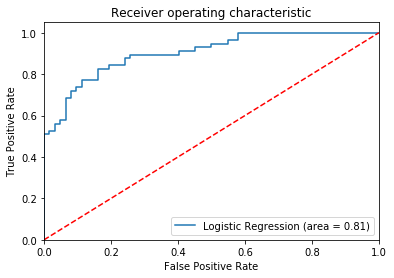

In [94]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [96]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48739495798319327


In [97]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 1 61]
 [ 0 57]]
